In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
import wandb
import pandas as pd
from matplotlib import pyplot as plt

In [2]:

# Helper Functions

def restore_file(wandb_id, filename='wandb-summary.json'):
    files_dir = 'notebooks/restored_files'    
    os.system(f'mkdir -p {files_dir}')

    api = wandb.Api()
    run = api.run(f'semantic_uncertainty/{wandb_id}')

    path = f'{files_dir}/{filename}'
    os.system(f'rm -rf {path}')
    run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
    with open(path, 'r') as f:
        out = json.load(f)
    return out

def get_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    print(set(df['method']))
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy',
                    'beam_search_semantic_entropy','beam_search_cluster_assignment_entropy','beam_search_regular_entropy', 
                    'beam_sample_semantic_entropy','beam_sample_cluster_assignment_entropy','beam_sample_regular_entropy']
    df = df.set_index('method').loc[main_methods].reset_index()
    main_names = ['Semantic entropy', 'Discrete Semantic Entropy', 'Naive Entropy',
                  'Beam Search Semantic Entropy','Beam Search Discrete Semantic Entropy', 'Beam Search Naive Entropy',
                  'Beam Sample Semantic Entropy','Beam Sample Discrete Semantic Entropy', 'Beam Sample Naive Entropy']
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

{'beam_search_regular_entropy', 'beam_sample_semantic_entropy', 'beam_sample_semantic_entropy_UNANSWERABLE', 'cluster_assignment_entropy', 'regular_entropy_UNANSWERABLE', 'semantic_entropy', 'beam_sample_cluster_assignment_entropy', 'beam_sample_regular_entropy_UNANSWERABLE', 'semantic_entropy_UNANSWERABLE', 'beam_search_cluster_assignment_entropy', 'regular_entropy', 'beam_search_semantic_entropy', 'beam_search_cluster_assignment_entropy_UNANSWERABLE', 'beam_sample_cluster_assignment_entropy_UNANSWERABLE', 'beam_sample_regular_entropy', 'cluster_assignment_entropy_UNANSWERABLE', 'beam_search_regular_entropy_UNANSWERABLE', 'beam_search_semantic_entropy_UNANSWERABLE'}


(0.2, 0.8)

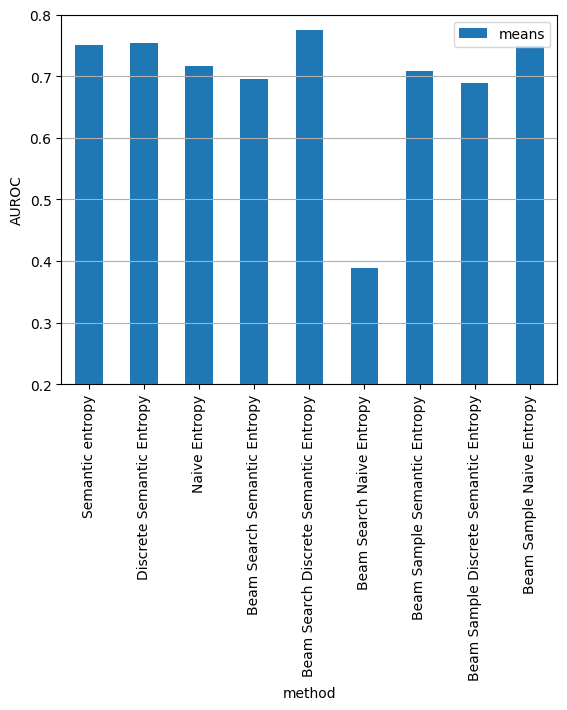

In [15]:
# wandb_id = '2c1j1na9' # llama2-7b
# wandb_id = 'h8rgt8in' # llama2-7b-chat
wandb_id = 'e8p0crkq'
if wandb_id == 'YOUR_ID':
    raise ValueError('Need to provide wandb_id of demo run!')
results = restore_file(wandb_id)
unc_df = get_uncertainty_df(results)

metric = 'AUROC'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.2, 0.8)

(0.4, 0.8)

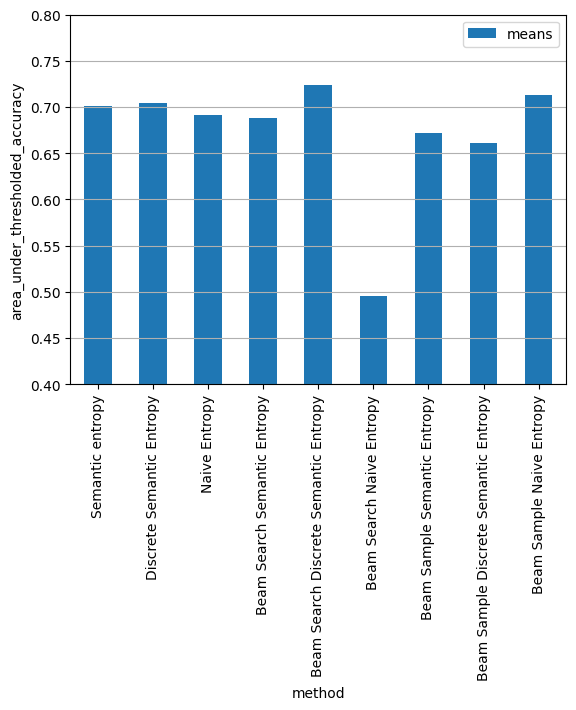

In [13]:
metric = 'area_under_thresholded_accuracy'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.4, 0.8)

(0.0, 0.8)

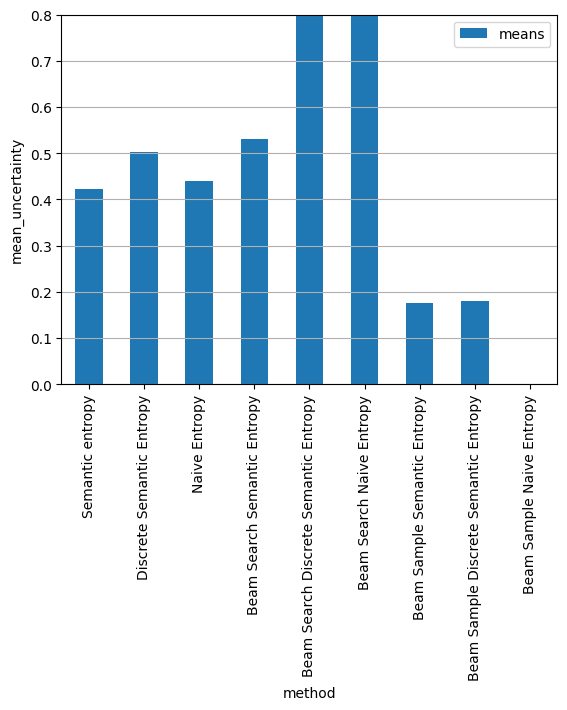

In [12]:
metric = 'mean_uncertainty'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.0, 0.8)

(0.4, 0.8)

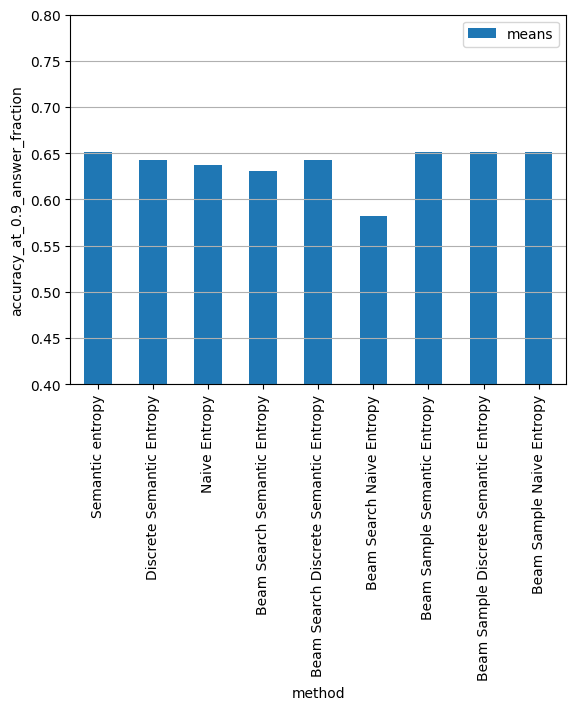

In [11]:
metric = 'accuracy_at_0.9_answer_fraction'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.4, 0.8)

(0.2, 0.8)

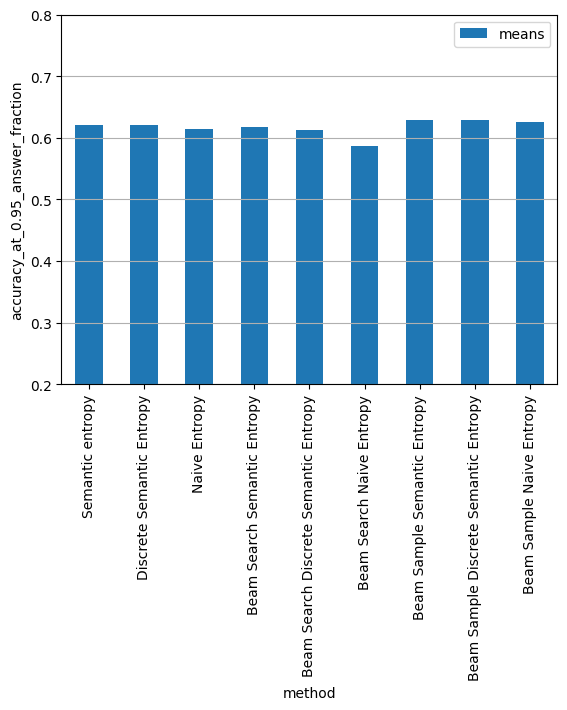

In [10]:
metric = 'accuracy_at_0.95_answer_fraction'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.2, 0.8)

(0.2, 0.8)

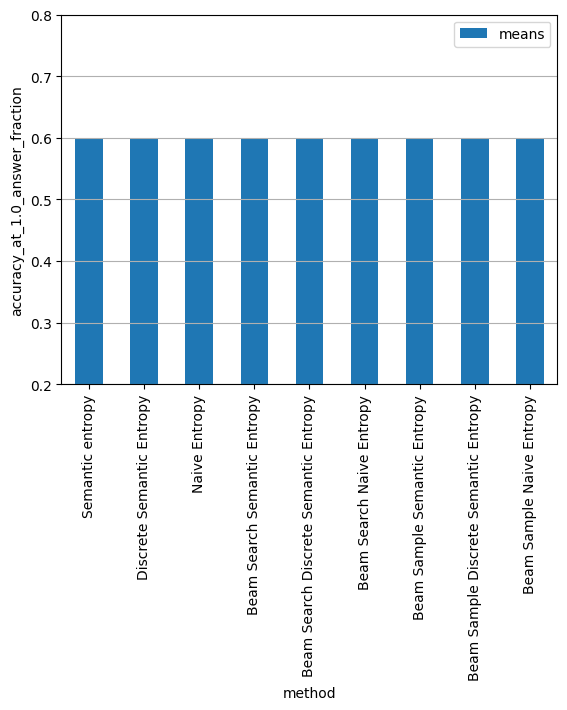

In [9]:
metric = 'accuracy_at_1.0_answer_fraction'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.2, 0.8)